In [1]:
!pip install lime

import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import warnings 
from scipy.stats import randint
import lime
import lime.lime_tabular

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

# Load the Data

In [2]:
train = pd.read_csv(r'C:\Users\user\Downloads\data (1)\data\classification\adult.data', header = None)

train.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

print (train.shape)
train.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test = pd.read_csv(r'C:\Users\user\Downloads\data (1)\data\classification\adult.test',skiprows=1, header = None)


test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
          'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
          'hours-per-week', 'native-country', 'income']

print (test.shape)
test.head()

(16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
train.describe()
# We can observe an outlier in the capital-gain and capital loss

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


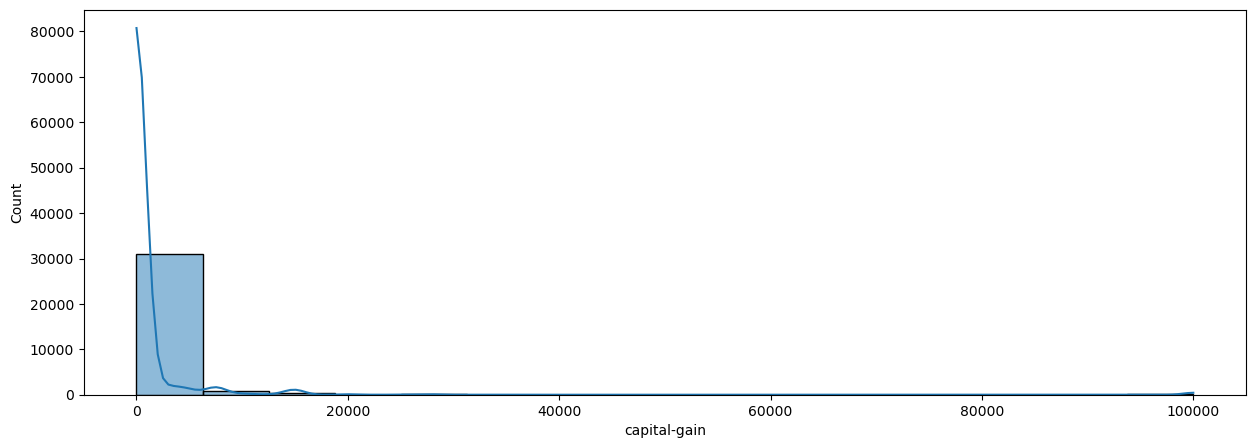

In [5]:
plt.figure(figsize=(15, 5))
sns.histplot(data=train, x="capital-gain", kde=True)
plt.show()

In [6]:
#Remove outliers
train = train.loc[train['capital-gain'] < 20000]
print(train.shape)
test = test.loc[test['capital-gain'] < 20000]
print(train.shape)

(32308, 15)
(32308, 15)


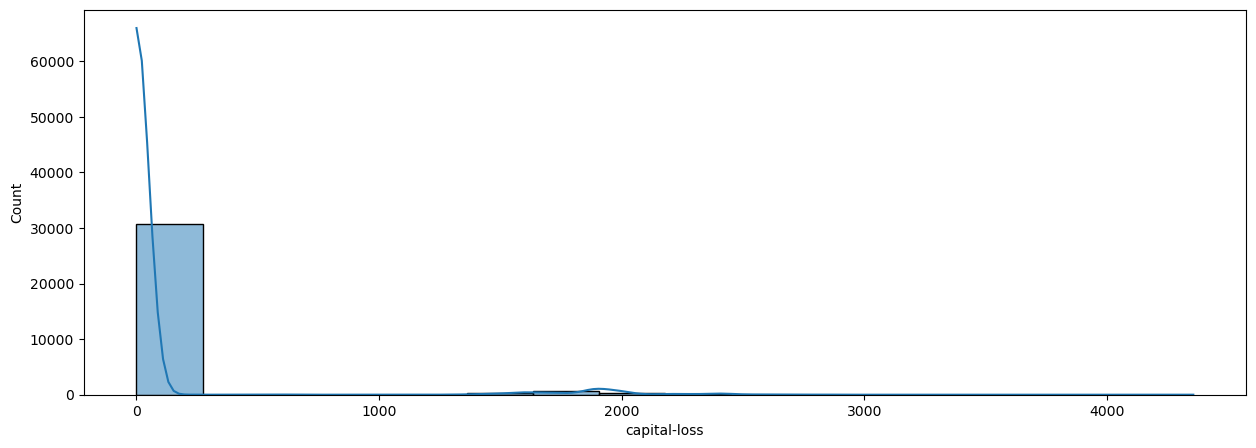

In [7]:
plt.figure(figsize=(15, 5))
sns.histplot(data=train, x="capital-loss", kde=True)
plt.show()

In [8]:
#Remove outliers
train = train.loc[train['capital-loss'] < 2000]
train.shape
test = test.loc[test['capital-loss'] < 2000]
train.shape

(31983, 15)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31983 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31983 non-null  int64 
 1   workclass       31983 non-null  object
 2   fnlwgt          31983 non-null  int64 
 3   education       31983 non-null  object
 4   education-num   31983 non-null  int64 
 5   marital-status  31983 non-null  object
 6   occupation      31983 non-null  object
 7   relationship    31983 non-null  object
 8   race            31983 non-null  object
 9   sex             31983 non-null  object
 10  capital-gain    31983 non-null  int64 
 11  capital-loss    31983 non-null  int64 
 12  hours-per-week  31983 non-null  int64 
 13  native-country  31983 non-null  object
 14  income          31983 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.9+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15987 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15987 non-null  int64 
 1   workclass       15987 non-null  object
 2   fnlwgt          15987 non-null  int64 
 3   education       15987 non-null  object
 4   education-num   15987 non-null  int64 
 5   marital-status  15987 non-null  object
 6   occupation      15987 non-null  object
 7   relationship    15987 non-null  object
 8   race            15987 non-null  object
 9   sex             15987 non-null  object
 10  capital-gain    15987 non-null  int64 
 11  capital-loss    15987 non-null  int64 
 12  hours-per-week  15987 non-null  int64 
 13  native-country  15987 non-null  object
 14  income          15987 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.0+ MB


# Check for missing values

In [11]:
print("Nulls in train","-"*20)
print(train.isnull().sum())

Nulls in train --------------------
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [12]:
print("Nulls in test","-"*20)
print(test.isnull().sum())

Nulls in test --------------------
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [13]:
train.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [14]:
test.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [15]:
#0 missing values!?
#But we see some "?"

In [16]:
test.replace(to_replace ='[ ]*\?', value = np.nan, regex = True, inplace=True)

In [17]:
test.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool

In [18]:
train.replace(to_replace ='[ ]*\?', value = np.nan, regex = True, inplace=True)

In [19]:
train.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool

### Imputer

In [20]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [21]:
train[['workclass','occupation','native-country']] = imp_cat.fit_transform(train[['workclass','occupation','native-country']])
test[['workclass','occupation','native-country']] = imp_cat.transform(test[['workclass','occupation','native-country']])

In [22]:
train.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

# EDA

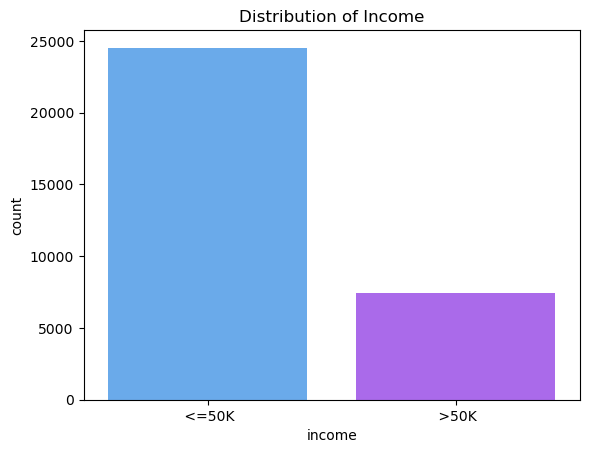

In [23]:
sns.countplot(x='income', data=train, palette="cool")
plt.title('Distribution of Income')
plt.show()

In [24]:
train['income'].value_counts()

income
 <=50K    24529
 >50K      7454
Name: count, dtype: int64

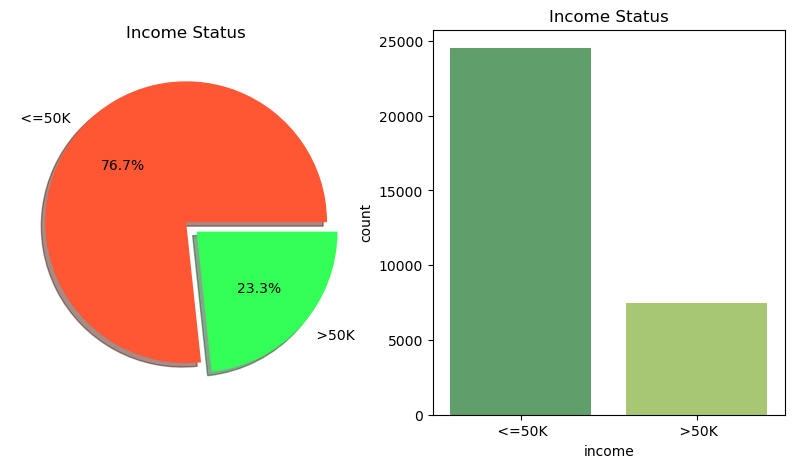

In [25]:
custom_colors = ['#FF5733', '#33FF57']
f, ax = plt.subplots(1,2,figsize=(10,5))
train['income'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True,colors=custom_colors)
ax[0].set_title('Income Status')
ax[0].set_ylabel('')
sns.countplot(x='income', data=train, ax=ax[1],palette='summer')
ax[1].set_title('Income Status')
plt.show()

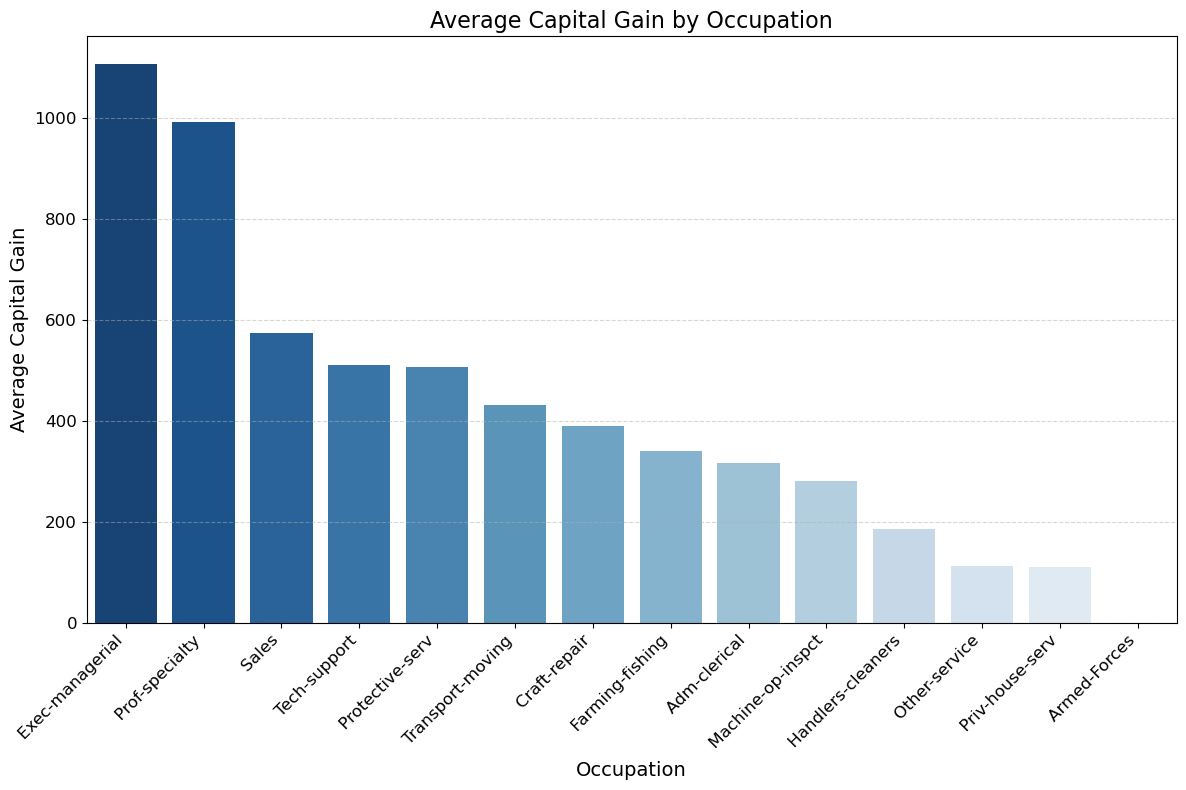

In [26]:
grouped = train.groupby('occupation')['capital-gain'].mean().reset_index()

grouped_sorted = grouped.sort_values(by='capital-gain', ascending=False)

plt.figure(figsize=(12, 8))

sns.barplot(x='occupation', y='capital-gain', data=grouped_sorted, palette='Blues_r')

plt.title('Average Capital Gain by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Average Capital Gain', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

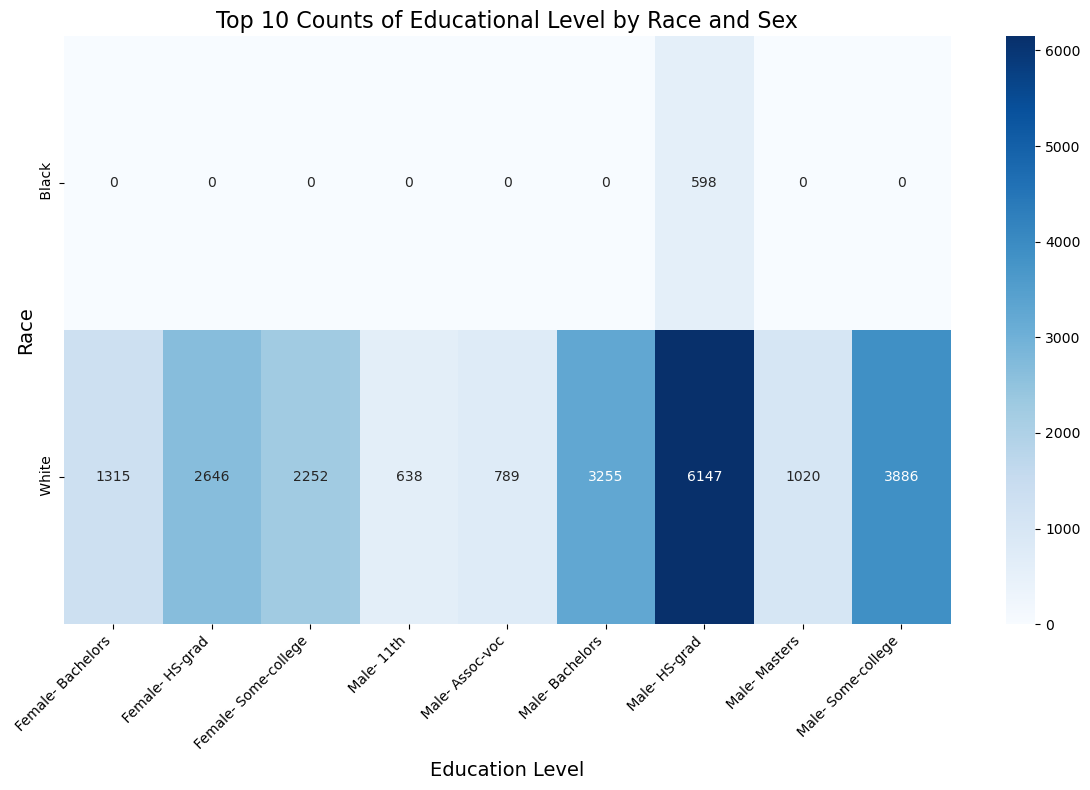

In [27]:
grouped = train.groupby(['education', 'race', 'sex']).size().reset_index(name='count')

grouped_sorted = grouped.sort_values(by='count', ascending=False)

top_10 = grouped_sorted.head(10)

pivot_df = top_10.pivot_table(index='race', columns=['sex', 'education'], values='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt='d', cmap='Blues')
plt.title('Top 10 Counts of Educational Level by Race and Sex', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Race', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

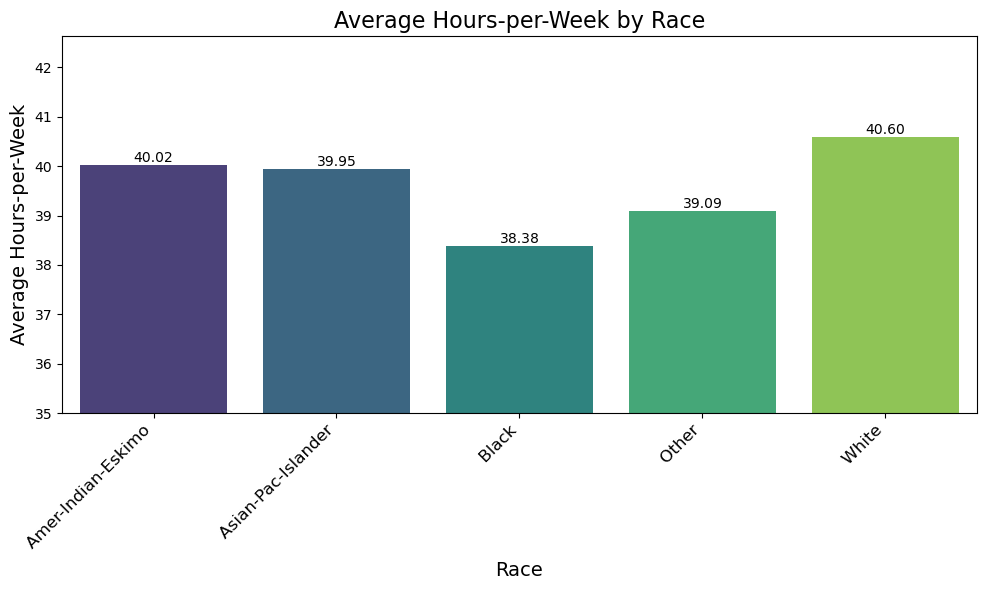

In [28]:
grouped = train.groupby('race')['hours-per-week'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='hours-per-week', data=grouped, palette='viridis')
plt.title('Average Hours-per-Week by Race', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Average Hours-per-Week', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, row in grouped.iterrows():
    plt.text(index, row['hours-per-week'], f'{row["hours-per-week"]:.2f}', color='black', ha='center', va='bottom', fontsize=10)

plt.ylim(35, None)
plt.tight_layout()
plt.show()

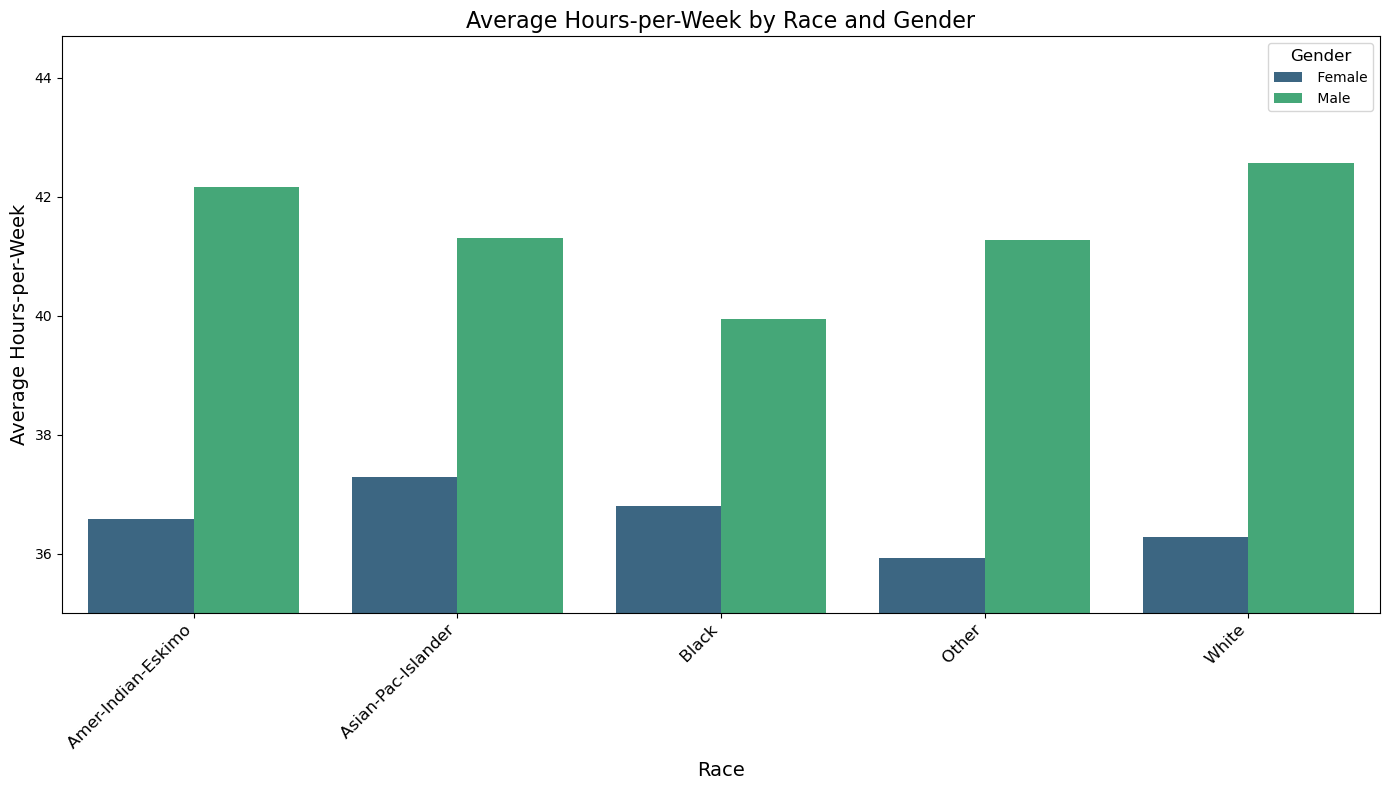

In [29]:
grouped = train.groupby(['race', 'sex'])['hours-per-week'].mean().reset_index()

plt.figure(figsize=(14, 8))

sns.barplot(x='race', y='hours-per-week', hue='sex', data=grouped, palette='viridis', linewidth=2.5)

plt.title('Average Hours-per-Week by Race and Gender', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Average Hours-per-Week', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Gender', title_fontsize='12', fontsize='10')
plt.ylim(35, None)

plt.tight_layout()
plt.show()

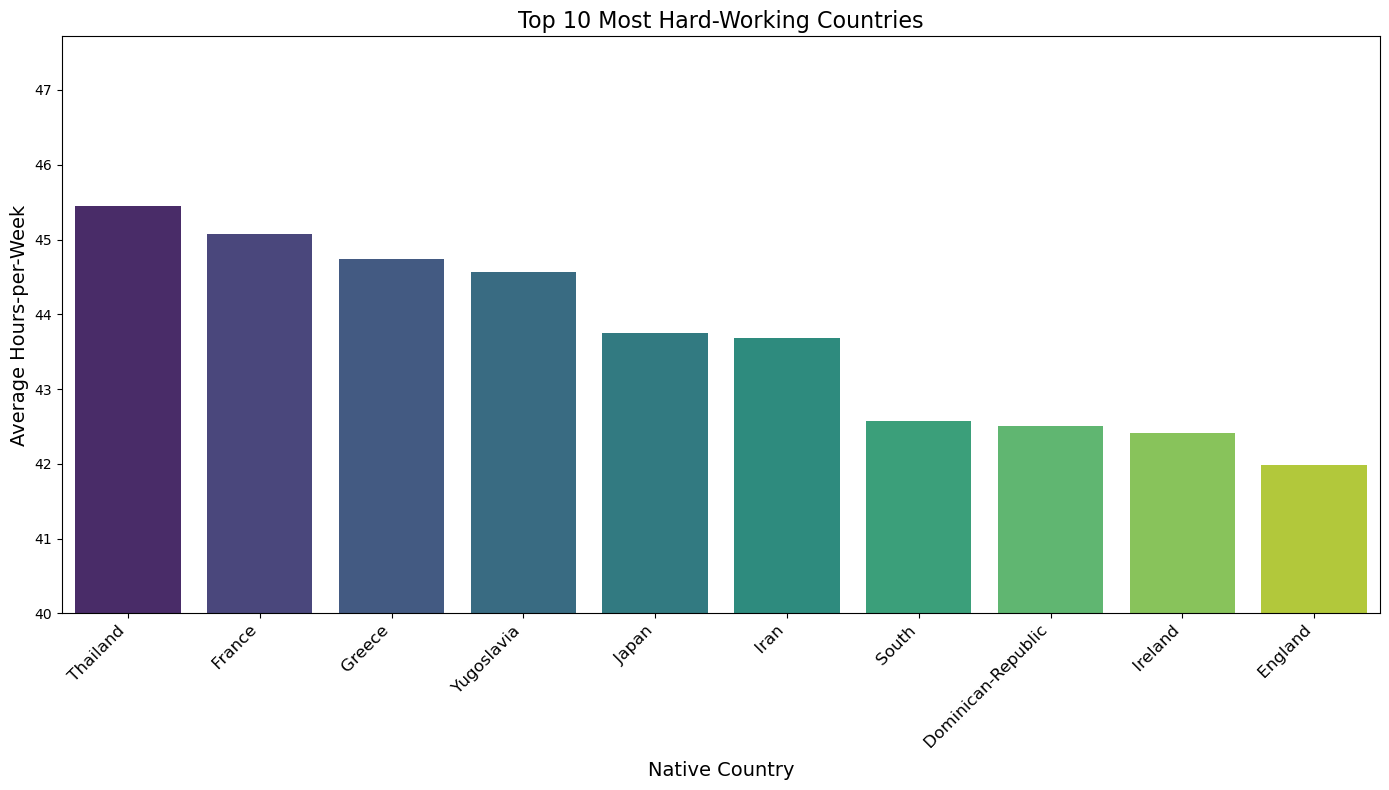

In [30]:
grouped = train.groupby('native-country')['hours-per-week'].mean().reset_index()

grouped_sorted = grouped.sort_values(by='hours-per-week', ascending=False)

top_10 = grouped_sorted.head(10)

plt.figure(figsize=(14, 8))

sns.barplot(x='native-country', y='hours-per-week', data=top_10, palette='viridis', linewidth=2.5)

plt.title('Top 10 Most Hard-Working Countries', fontsize=16)
plt.xlabel('Native Country', fontsize=14)
plt.ylabel('Average Hours-per-Week', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(40, None)

plt.tight_layout()
plt.show()

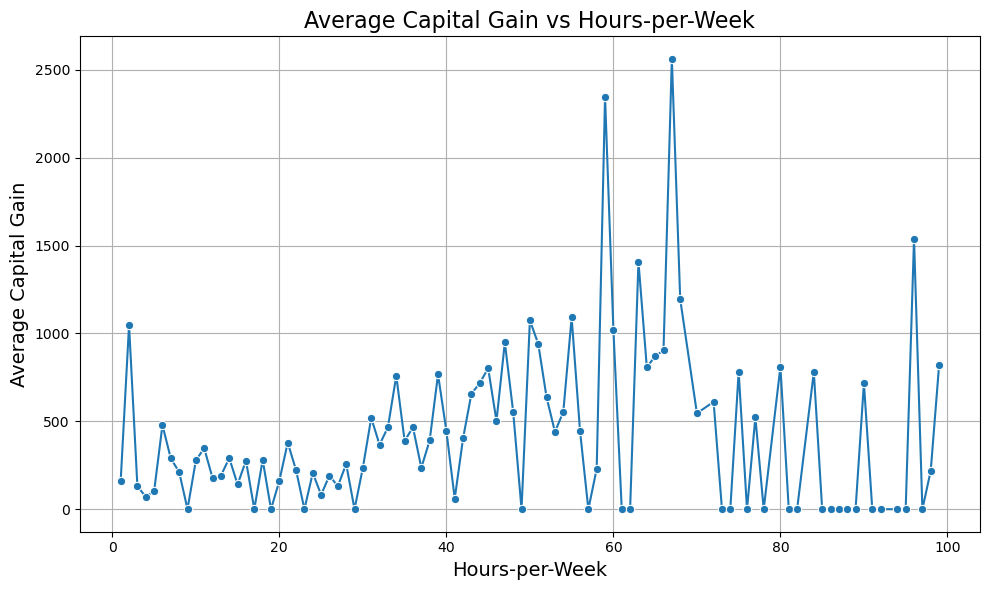

In [31]:
grouped = train.groupby('hours-per-week')['capital-gain'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='hours-per-week', y='capital-gain', data=grouped, marker='o')
plt.title('Average Capital Gain vs Hours-per-Week', fontsize=16)
plt.xlabel('Hours-per-Week', fontsize=14)
plt.ylabel('Average Capital Gain', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Categorical Features

In [32]:
print("Train types:\n")
print(train.dtypes,"\n\n")
print("Test types:\n")
print(test.dtypes)

Train types:

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object 


Test types:

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [33]:
train_ohe = train[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]
train_ohe = pd.get_dummies(train_ohe, dtype=int)

train = train.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
                   , axis = 1)
train = train.join(train_ohe)

train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test_ohe = test[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]
train_ohe = pd.get_dummies(test_ohe, dtype=int)

test = test.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], axis = 1)
test = test.join(train_ohe)

test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,226802,7,0,0,40,<=50K.,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,<=50K.,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,>50K.,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,>50K.,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,<=50K.,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Split

In [36]:
X_train = train.drop('income', axis=1)
y_train = train["income"]

print ("X dimensions: ", X_train.shape)
print ("y dimensions: ", y_train.shape)

X dimensions:  (31983, 104)
y dimensions:  (31983,)


In [37]:
X_test = test.drop('income', axis=1)
y_test = test["income"]

print ("X dimensions: ", X_test.shape)
print ("y dimensions: ", y_test.shape)

X dimensions:  (15987, 105)
y dimensions:  (15987,)


In [38]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [39]:
column_order = X_train.columns
X_test = X_test[column_order]

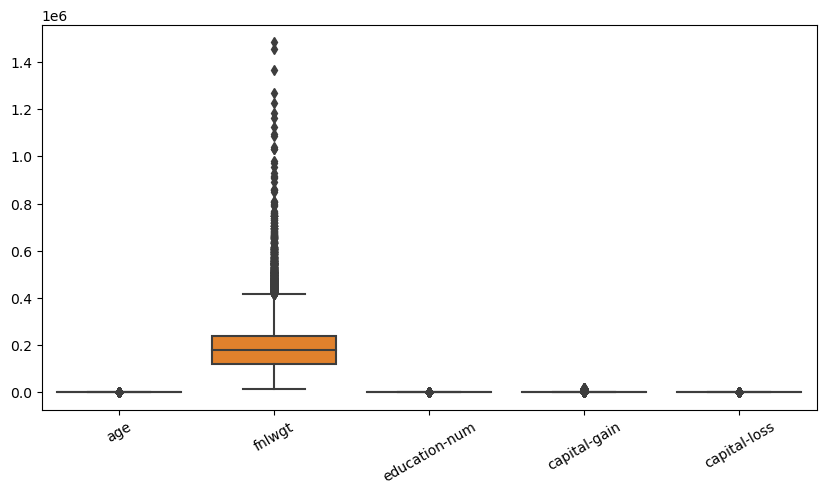

In [40]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=X_train.iloc[:, :5])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

In [41]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

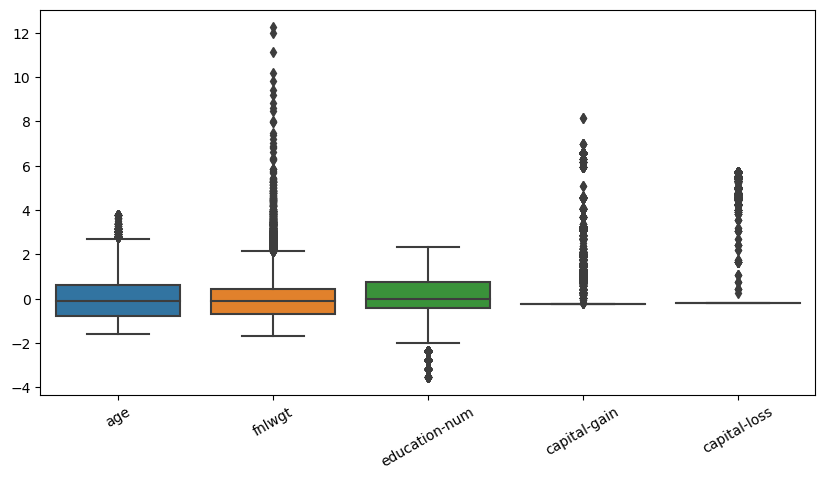

In [42]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=X_train.iloc[:, :5])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

In [43]:
clf_results = pd.DataFrame([])

# Random Forest

In [44]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Accuracy for Random Forest is ', round(metrics.accuracy_score(y_test, y_pred_rf), 3))
print('\n', metrics.classification_report(y_test, y_pred_rf))

Accuracy for Random Forest is  0.85

               precision    recall  f1-score   support

           0       0.88      0.93      0.90     12331
           1       0.70      0.59      0.64      3656

    accuracy                           0.85     15987
   macro avg       0.79      0.76      0.77     15987
weighted avg       0.84      0.85      0.84     15987



In [45]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'RF',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_rf),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_rf), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.85,0.644


In [46]:
param_grid = {'n_estimators': np.arange(10, 300, 10),
              'max_features' : ['sqrt', 'log2', None], 
              'max_depth': [None, 3, 5, 10, 20], 
             }

cv_rf = RandomizedSearchCV(RandomForestClassifier(random_state=0), 
                           param_distributions=param_grid, 
                           n_iter = 20,
                           cv = 5,
                           n_jobs = -1,
                           random_state=0)
cv_rf.fit(X_train, y_train)

print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'n_estimators': 210, 'max_features': 'sqrt', 'max_depth': 20}


# Optimal Random Forest

In [47]:
rf_opt = cv_rf.best_estimator_
rf_opt.fit(X_train, y_train) 
y_pred_rf_opt = rf_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_rf_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_rf_opt))

Test set accuracy:  0.866

               precision    recall  f1-score   support

           0       0.88      0.95      0.92     12331
           1       0.77      0.58      0.66      3656

    accuracy                           0.87     15987
   macro avg       0.83      0.77      0.79     15987
weighted avg       0.86      0.87      0.86     15987



In [48]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'RF Opt',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_rf_opt),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_rf_opt), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.850,0.644
0,RF Opt,0.866,0.665


# KNN

In [49]:
knn =KNeighborsClassifier() 
knn.fit(X_train, y_train) 
y_pred_knn = knn.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_knn), 3))
print('\n', metrics.classification_report(y_test, y_pred_knn))

Test set accuracy:  0.832

               precision    recall  f1-score   support

           0       0.88      0.91      0.89     12331
           1       0.65      0.58      0.61      3656

    accuracy                           0.83     15987
   macro avg       0.76      0.74      0.75     15987
weighted avg       0.83      0.83      0.83     15987



In [50]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'KNN',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_knn),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_knn), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.850,0.644
0,RF Opt,0.866,0.665
0,KNN,0.832,0.611


In [51]:
knn_param_grid = dict(n_neighbors = np.arange(1, 21, 5), 
                      weights = ['uniform', 'distance'], 
                      metric = ['minkowski','euclidean','manhattan'])

knn_grid_cv = GridSearchCV(KNeighborsClassifier(), 
                           knn_param_grid, 
                           cv=5)

knn_grid_cv.fit(X_train, y_train) 

print("Best parameters: n_neighbors=", knn_grid_cv.best_params_['n_neighbors'])
print("Best parameters: weights =", knn_grid_cv.best_params_['weights'])
print("Best parameters: metric =", knn_grid_cv.best_params_['metric'])

Best parameters: n_neighbors= 16
Best parameters: weights = uniform
Best parameters: metric = minkowski


# Optimal KNN

In [52]:
knn_opt = knn_grid_cv.best_estimator_
knn_opt.fit(X_train, y_train) 
y_pred_knn_opt = knn_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_knn_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_knn_opt))

Test set accuracy:  0.841

               precision    recall  f1-score   support

           0       0.87      0.93      0.90     12331
           1       0.70      0.53      0.60      3656

    accuracy                           0.84     15987
   macro avg       0.79      0.73      0.75     15987
weighted avg       0.83      0.84      0.83     15987



In [53]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'KNN Opt',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_knn_opt),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_knn_opt), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.850,0.644
0,RF Opt,0.866,0.665
0,KNN,0.832,0.611
0,KNN Opt,0.841,0.604


# SVM

In [54]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_rbf_svm = rbf_svm.predict(X_test)

print('Accuracy for RBF SVM is:', round(metrics.accuracy_score(y_test, y_pred_rbf_svm), 3))
print('\n', metrics.classification_report(y_test, y_pred_rbf_svm))

Accuracy for RBF SVM is: 0.854

               precision    recall  f1-score   support

           0       0.88      0.94      0.91     12331
           1       0.74      0.56      0.64      3656

    accuracy                           0.85     15987
   macro avg       0.81      0.75      0.77     15987
weighted avg       0.85      0.85      0.85     15987



In [55]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'SVM rbf',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_rbf_svm),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_rbf_svm), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.850,0.644
0,RF Opt,0.866,0.665
0,KNN,0.832,0.611
0,KNN Opt,0.841,0.604
0,SVM rbf,0.854,0.637


In [56]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear_svm =linear_svm.predict(X_test)

print('Accuracy for Linear SVM is:', round(metrics.accuracy_score(y_test, y_pred_linear_svm), 3))
print('\n', metrics.classification_report(y_test, y_pred_linear_svm))

Accuracy for Linear SVM is: 0.852

               precision    recall  f1-score   support

           0       0.88      0.94      0.91     12331
           1       0.73      0.57      0.64      3656

    accuracy                           0.85     15987
   macro avg       0.80      0.75      0.77     15987
weighted avg       0.84      0.85      0.85     15987



In [57]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'SVM Linear',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_linear_svm),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_linear_svm), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.850,0.644
0,RF Opt,0.866,0.665
0,KNN,0.832,0.611
0,KNN Opt,0.841,0.604
0,SVM rbf,0.854,0.637
0,SVM Linear,0.852,0.637


# Logistic Regression

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_logreg), 3))
print('\n', metrics.classification_report(y_test, y_pred_logreg))

Test set accuracy:  0.854

               precision    recall  f1-score   support

           0       0.88      0.93      0.91     12331
           1       0.72      0.59      0.65      3656

    accuracy                           0.85     15987
   macro avg       0.80      0.76      0.78     15987
weighted avg       0.85      0.85      0.85     15987



In [59]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Logistic Regression',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_logreg),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_logreg), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.850,0.644
0,RF Opt,0.866,0.665
0,KNN,0.832,0.611
0,KNN Opt,0.841,0.604
0,SVM rbf,0.854,0.637
0,SVM Linear,0.852,0.637
0,Logistic Regression,0.854,0.647


# Optimal Logistic Regression

In [60]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  
}

cv_logreg = RandomizedSearchCV(estimator=LogisticRegression(), 
                               param_distributions=param_grid, 
                               scoring='accuracy', 
                               cv=10, 
                               n_iter=10,  
                               n_jobs=-1)

cv_logreg.fit(X_train, y_train)

print('Best Parameters using Randomized Search CV: ', cv_logreg.best_params_)

Best Parameters using Randomized Search CV:  {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.001}


In [61]:
logreg_opt = cv_logreg.best_estimator_
logreg_opt.fit(X_train, y_train) 
y_pred_logreg_opt = logreg_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_logreg_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_logreg_opt))

Test set accuracy:  0.854

               precision    recall  f1-score   support

           0       0.89      0.93      0.91     12331
           1       0.71      0.61      0.65      3656

    accuracy                           0.85     15987
   macro avg       0.80      0.77      0.78     15987
weighted avg       0.85      0.85      0.85     15987



In [62]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Logistic Regression Opt',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_logreg_opt),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_logreg_opt), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.850,0.644
0,RF Opt,0.866,0.665
0,KNN,0.832,0.611
0,KNN Opt,0.841,0.604
0,SVM rbf,0.854,0.637
0,SVM Linear,0.852,0.637
0,Logistic Regression,0.854,0.647
0,Logistic Regression Opt,0.854,0.654


# Neural Networks

In [63]:
nn = MLPClassifier(random_state=0)

nn.fit(X_train, y_train)

y_pred_nn = nn.predict(X_test)

print('Accuracy for Neural Network is ', round(metrics.accuracy_score(y_test, y_pred_nn), 3))
print('\n', metrics.classification_report(y_test, y_pred_nn))

Accuracy for Neural Network is  0.832

               precision    recall  f1-score   support

           0       0.88      0.91      0.89     12331
           1       0.65      0.59      0.62      3656

    accuracy                           0.83     15987
   macro avg       0.76      0.75      0.75     15987
weighted avg       0.83      0.83      0.83     15987



C:\Users\user\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [64]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'NN',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_nn),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_nn), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.850,0.644
0,RF Opt,0.866,0.665
0,KNN,0.832,0.611
0,KNN Opt,0.841,0.604
0,SVM rbf,0.854,0.637
0,SVM Linear,0.852,0.637
0,Logistic Regression,0.854,0.647
0,Logistic Regression Opt,0.854,0.654
0,NN,0.832,0.616


# Optimal Neural Network

In [65]:
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

nn = MLPClassifier(random_state=0)

cv_nn = RandomizedSearchCV(estimator=nn,
                                   param_distributions=param_dist,
                                   scoring='accuracy',
                                   cv=5,
                                   n_iter=5,
                                   n_jobs=-1,
                                   random_state=0)

cv_nn.fit(X_train, y_train)

print('Best Parameters using Randomized Search: ', cv_nn.best_params_)

Best Parameters using Randomized Search:  {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'logistic'}


In [66]:
nn_opt = cv_nn.best_estimator_
nn_opt.fit(X_train, y_train) 
y_pred_nn_opt = nn_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_nn_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_nn_opt))

Test set accuracy:  0.853

               precision    recall  f1-score   support

           0       0.89      0.93      0.91     12331
           1       0.72      0.59      0.65      3656

    accuracy                           0.85     15987
   macro avg       0.80      0.76      0.78     15987
weighted avg       0.85      0.85      0.85     15987



In [67]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'NN Opt',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_nn_opt),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_nn_opt), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.850,0.644
0,RF Opt,0.866,0.665
0,KNN,0.832,0.611
0,KNN Opt,0.841,0.604
0,SVM rbf,0.854,0.637
0,SVM Linear,0.852,0.637
0,Logistic Regression,0.854,0.647
0,Logistic Regression Opt,0.854,0.654
0,NN,0.832,0.616
0,NN Opt,0.853,0.648


In [68]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'kernel': ['linear', 'rbf'], 
              'gamma': ['auto', 1, 0.1, 0.01, 0.001]} 

cv_svm = RandomizedSearchCV(estimator=SVC(),
                            param_distributions=param_grid,
                            scoring='accuracy',
                            cv=5,
                            n_iter=5,
                            n_jobs=-1)


cv_svm.fit(X_train, y_train)

print('Best Parameters using grid search: ', cv_svm.best_params_)

Best Parameters using grid search:  {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}


In [69]:
svm_opt = cv_svm.best_estimator_
svm_opt.fit(X_train, y_train) 
y_pred_svm_opt = svm_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_svm_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_svm_opt))

Test set accuracy:  0.854

               precision    recall  f1-score   support

           0       0.88      0.94      0.91     12331
           1       0.73      0.57      0.64      3656

    accuracy                           0.85     15987
   macro avg       0.81      0.75      0.78     15987
weighted avg       0.85      0.85      0.85     15987



In [70]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'SVM Opt',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svm_opt),3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svm_opt), 3)})])

clf_results = clf_results.sort_values(by=['Accuracy', 'F1'], ascending=[False, False])
clf_results

,Model,Accuracy,F1
0,RF Opt,0.866,0.665
0,Logistic Regression Opt,0.854,0.654
0,Logistic Regression,0.854,0.647
0,SVM Opt,0.854,0.642
0,SVM rbf,0.854,0.637
0,NN Opt,0.853,0.648
0,SVM Linear,0.852,0.637
0,RF,0.850,0.644
0,KNN Opt,0.841,0.604
0,NN,0.832,0.616


In [71]:
ensemble = VotingClassifier(estimators=[
    ('KNN', KNeighborsClassifier(n_neighbors=16, weights='uniform', metric='minkowski')),
    ('RFor', RandomForestClassifier(n_estimators=210, max_features='sqrt', max_depth=20, random_state=0)),
    ('SVM', SVC(kernel='rbf', gamma='auto', C=1, probability=True)),
    ('LR', LogisticRegression(solver='liblinear', penalty='l2', C=0.001)),
    ('NN', MLPClassifier(solver='sgd', learning_rate='adaptive', hidden_layer_sizes=(100,), alpha=0.0001, activation='logistic')
    )], voting='soft')

ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test)

print('The accuracy for ensembled model is:', ensemble.score(X_test, y_test))
print('\n', metrics.classification_report(y_test, y_pred_ensemble))

The accuracy for ensembled model is: 0.8583223869393882

               precision    recall  f1-score   support

           0       0.88      0.94      0.91     12331
           1       0.75      0.58      0.65      3656

    accuracy                           0.86     15987
   macro avg       0.81      0.76      0.78     15987
weighted avg       0.85      0.86      0.85     15987



In [48]:
class_names = le.classes_
class_names

array([' <=50K.', ' >50K.'], dtype=object)

In [49]:
feature_names = X_train.columns.tolist()
feature_names

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-re

In [50]:
predict_rf = lambda x: cv_rf.predict_proba(x).astype(float)
X_train=X_train.values
X_test=X_test.values

In [51]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                   feature_names=feature_names,
                                                   class_names=class_names,
                                                   kernel_width=3)

In [52]:
np.random.seed(1)
i = 69

explanation = explainer.explain_instance(X_test[i], predict_rf, num_features=104)
explanation.show_in_notebook(show_all=False)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
